## Overview
This unit deals with so-called descriptive statistics. These are calculated values that summarize aspects of a data set. First we will focus on measures of central tendency, which as the name suggests, are statistics that aim to estimate the center of the data set around which (usually) most of the data values occur. Then, we will focus on measures of variability. These statistics reflect how spread out the data is in relation to other data points or the center of the data set. Measures of central tendency and variability require the data to have interval or ratio scales. After this notebook you will know:
* how to calculate sample mean, median, and mode and what each of these measures of central tendency tells you.
* how to calculate sample variance and standard deviation.
* how to calculate the z scores and determine the probability of a given z-score using a z-table.
* how to calculate standard error of a sample mean.
* how to calculate confidence intervals using a z-score for a given confidence level (&alpha; level).

In [1]:
# Python uses packages to simplify data manipulation and analysis. Three of the most important packages
# are called Numpy, Pandas, and Matplotlib
import numpy as np # linear algebra and data processing
import pandas as pd # data processing and file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for ploting data
import seaborn as sns # makes even nicer plots (might use, don't know)

The following cell will import the WineEnthusiast data set using pandas. The data is linked to above and is formated as a CSV (comma-separated-values) file. Such a file could be opend in Excel but here we simply load the file into a pandas data structure called a dataframe and print out the first couple rows of the dataframe.

In [2]:
url = "https://raw.githubusercontent.com/prof-groff/evns462/master/data/winemag-data-130k-v2.tar.gz"
wine_data = pd.read_csv(url, compression='gzip')

## Measures of Central Tendency
The following definitions of mean, median, and mode state in words how each is calculated. 
* **Mean:** The mean of a data set is the average value. Is that circular? Let me state this in the form of an algorithm. To find the mean of a data set first sum up all of the values in the data set then divide by the number of data points or examples in the data set. When we find or know the mean of an entire population we call that mean a parameter of the population and in is assigned the symbol &mu;. When the mean is of a sample it is a statistic of the sample ans is assigned the symbol x&#772;.
* **Median:** The median of a data set is simply the data point that occurs exactly in the middle of the data set. To find the median first the data needs to be sorted and listed in ascending or descending order. Then if there is an odd number of data points in the set the median is in the exact middle of this list. If there is an even number of data points in the list then the median is the average of the two middle values in the list.
* **Mode:** The mode is the value in a data set that is repeated the most often. 
Below the mean, median, and mode are calculated for a dummy data set. 

In [3]:
import scipy.stats as stats # some useful stuff

x = np.array([2, 5, 3, 8, 6, 3, 4, 1, 9, 4, 3])
# find the mean
sum_x = x.sum()
length_x = len(x)
print("sum: ", sum_x)
print("count: ", length_x)
print("mean: ", sum_x/length_x)
print("mean: ", x.mean())

idx_middle = length_x//2
x_sorted = np.sort(x)
print("sorted x: ", x_sorted)
print("index of middle: ", idx_middle)
print("median: ", x_sorted[idx_middle])
print("median: ", np.median(x).astype(int))

from collections import Counter
x_counts = Counter(x)
print("mode: ", x_counts.most_common(1)[0][0])
print("mode: ", stats.mode(x).mode[0])

sum:  48
count:  11
mean:  4.36363636364
mean:  4.36363636364
sorted x:  [1 2 3 3 3 4 4 5 6 8 9]
index of middle:  5
median:  4
median:  4
mode:  3
mode:  3


## Measure of Central Tendancy Continued
Interestingly, a normal or Gaussian distribution will have the same mean, median, and mode. A distribution (like that for the wine price data) that is skewed right (toward higher prices) will have a mean that is greater than the median, which in turn is greater the mode. Let's calculate the mean median and mode of the wine point scores data and the wine price data.

In [4]:
prices = wine_data.loc[wine_data.index[wine_data['price']>0], "price"] # doing some filtering to remove NaN
scores = wine_data["points"]

# these are pandas data series so it is easy to get mean, median, and mode using built in methods
print("price data stats:")
print("mean: ", prices.mean())
print("median: ", prices.median())
print("mode: ", prices.mode())
print("point score data stats:")
print("mean: ", scores.mean())
print("median: ", scores.median())
print("mode: ", scores.mode())

price data stats:
mean:  35.363389129985535
median:  25.0
mode:  0    20.0
dtype: float64
point score data stats:
mean:  88.44713820775404
median:  88.0
mode:  0    88.0
dtype: float64


## Measures of Variability
The following definitions of variance and standard deviation state in words how each is calculated. 
* **Variance:** The variance of a data set is found by first finding the deviation of each element in the data set from the mean. These deviations are squared and then added together. (Why are they squared?) Finally, the sum of squared deviations is normalized by the number of elements in the population, N,  for a population variance or the number of element in the sample minus one, N-1, for the sample variance. (Why is a sample variance normalized by N-1?)
* **Standard Deviation:** Once the variance is in hand, standard deviation is eacy to find. It is simply the square root of the variance. The symbol for population standard deviation is &sigma; while the simple for sample standard deviation is s or sd. 

Which of the data sets explored above (price and point scores) do you think has a larger standard deviation? Why?

In [5]:
print("variance of point scores: ", scores.var(ddof=0)) # normalizing by N-0 (just N) since this is population parameter
print("standard deviation of point scores: ", scores.std(ddof=0)) # by default N-1 would be used
print("variance of prices: ", prices.var(ddof=0)) 
print("standard deviation of prices: ", prices.std(ddof=0))

variance of point scores:  9.23988861404895
standard deviation of point scores:  3.0397185090150947
variance of prices:  1682.8084319113302
standard deviation of prices:  41.022048119411714


## Standard Score (Z-Score)
It is often useful to report individual data points drawn from a normal distribution (or other distribution) in standardized unints. This is done by specifying the measurement as a deviation from the population mean and normalized (divided) by the population standard deviation. Of course such a measure is only possible if the population parameters are known or can be reliably estimated.
* z = (x - &mu;)/&sigma;

Let's assume that height of adult male giraffes is normally distributed with a mean of 18 ft with a standard deviation of 1.5 ft. How many standardized units is Jeffrey Giraffe away from the mean if he is 21 ft tall?

In [6]:
z = (21-18)/1.5 
print(z)

2.0


This means that the height of Jeffrey Giraffe is two standard deviations from the population mean. What is the probability of finding such a tall giraffe in the population? If we normalize a normal distribution with mean 0 and standard deviation 1 (that is use standardized units) so the area under the curve is one, the probability of finding an element in a population above (or below) a given z-score can be calculated by finding the area under the curve for the the part of the distribution that is a distance equal to or further than the z-score from zero. Perhaps a picture will help. Below is the probability density function for a normal distribution with mean zero and a standard deviation of 1. The line at x = 2.0 shows the z-score for Jeffrey Giraffe. The area under the curve to the right of this line is the probability of finding such a tall Giraffe in the population. What is this probability. In practice we can look it up using a table called a z-table. 

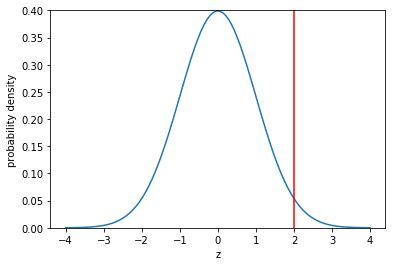

In [7]:
import matplotlib.mlab as mlab
mu = 0
sigma = 1
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.xlabel('z')
plt.ylabel('probability density')
plt.ylim([0, 0.4])
plt.plot([2,2],[0,0.4],color='r')
plt.show()

Using [this table](http://www.stat.ufl.edu/~athienit/Tables/Ztable.pdf) gives the probability to the left of the red line as 0.9772. So, the probability to the right of the red line is 1-0.9772 = 0.0228 or 2.28%. Jeffrey Giraffe's height  is pretty rare. 

## Sampling Distributions and Margin of Error
One thing we saw previously is that even if the population distributoin is non-normal, the sampling distribution of the mean (the distribution of all possible sample means) approaches a normal distribution as the sample size increases (Unit 1). Moreover, the mean of all sample mean is the same as the population mean and the standard deviation of the sample means is related to the standard deviation of the population and the sample size and is equal to a statistic called the standard error, SE = &sigma;/sqrt(N). What is the sample mean and standard error for the heights of a sample of giraffe's taken from Jeffrey Giraffe's herd? There heights were 21, 19, 17, 20, 18, and 19 ft. Recall that the population standard deviation is 1.5 ft. [](http://)

In [8]:
x = np.array([21,19,17,20,18,19])
x_bar = x.mean()
N = len(x)
SE = 1.5/np.sqrt(N)
print("SE = ", SE)
print("x_bar = ", x_bar, " +/- ", SE)

SE =  0.612372435696
x_bar =  19.0  +/-  0.612372435696


* Notice that the true population mean of 18ft is not in the range of the most likely (within one SE) range of values for this sample mean. Another way to report this is using something called a margin of error. Using the [z table](http://www.stat.ufl.edu/~athienit/Tables/Ztable.pdf) we see that a z-score of 1.96 leaves out a tail probability of 2.5% on the high end and a z-score of -1.96 leaves out a tail probability of 2.5% on the low end. Thus, if we don't care about the direction of departure, a z-score of 1.96 in either direction is the critical value beyond which there is only a 5% change of getting a sample statistic. In statistician speak, the 95% (&alpha; = 0.05) confidence interval for the sample mean is the range of values within 1.96 standard errors of the sample mean.

In [9]:
x_bar_low = x_bar - 1.96*SE
x_bar_high = x_bar + 1.96*SE
print("x_bar = ", x_bar, ", 95% CI [", x_bar_low, ", ", x_bar_high, "]")

x_bar =  19.0 , 95% CI [ 17.799750026 ,  20.200249974 ]
